## Importing Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc, f1_score, confusion_matrix, classification_report
from sklearn import tree 
from sklearn.preprocessing import OneHotEncoder
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.externals.six import StringIO  
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, MinMaxScaler, minmax_scale
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score
import xgboost as xgb
import math
from sklearn.utils.multiclass import unique_labels
import pydotplus
import seaborn as sns
import warnings
import eli5
from eli5.sklearn import PermutationImportance
warnings.filterwarnings('ignore')

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


# Import and View Data

In [2]:
df4 = pd.read_csv('data/savant_data_4.csv')

In [3]:
df4.shape

(40000, 89)

In [4]:
df4.game_date.unique()

array(['2019-09-29', '2019-09-28', '2019-09-27', '2019-09-26',
       '2019-09-25', '2019-09-24', '2019-09-23', '2019-09-22',
       '2019-09-21', '2019-09-20', '2019-09-19', '2019-09-18',
       '2019-09-17', '2019-09-16', '2019-09-15', '2019-09-14',
       '2019-09-13', '2019-09-12', '2019-09-11', '2019-09-10',
       '2019-09-09', '2019-09-08', '2019-09-07', '2019-09-06',
       '2019-09-05', '2019-09-04', '2019-09-03', '2019-09-02',
       '2019-09-01', '2019-08-31', '2019-08-30', '2019-08-29',
       '2019-08-28', '2019-08-27', '2019-08-26', '2019-08-25',
       '2019-08-24', '2019-08-23', '2019-08-22', '2019-08-21',
       '2019-08-20', '2019-08-19', '2019-08-18', '2019-08-17',
       '2019-08-16', '2019-08-15', '2019-08-14', '2019-08-13',
       '2019-08-12', '2019-08-11', '2019-08-10', '2019-08-09',
       '2019-08-08', '2019-08-07', '2019-08-06', '2019-08-05',
       '2019-08-04', '2019-08-03', '2019-08-02', '2019-08-01',
       '2019-07-31', '2019-07-30', '2019-07-29', '2019-

In [5]:
df4.columns

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estima

# Create New Feature, Spray Angle

In [6]:
df4['spray_angle'] = ((df4['hc_x'] - 125.42) / (198.27 - df4['hc_y'])) * 180/math.pi*.75

# View Groupings Graphically

In [156]:
import plotly.express as px

fig = px.scatter(df4, x="launch_speed", y="launch_angle", log_x=False, log_y = False,
                 hover_name="player_name", hover_data=None, color="events", color_discrete_sequence=px.colors.qualitative.Set3, title="Balls in Play by Category")
fig.update_xaxes(title_text='Launch Speed')
fig.update_yaxes(title_text='Launch Angle')
fig.show()

# Select Features and Clean Data

In [8]:
df4_rel = df4[['release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'zone',
       'stand', 'p_throws', 'type',
       'hit_location', 'balls', 'strikes', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z',
       'outs_when_up', 'inning', 'inning_topbot',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension',  'release_pos_y',
        'at_bat_number', 'pitch_number', 'pitch_name',
       'if_fielding_alignment', 'of_fielding_alignment', 'spray_angle']]

In [9]:
df4_rel.shape

(40000, 42)

In [10]:
df4_rel

release_speed  release_pos_x  release_pos_z         player_name  \
0               83.8        -0.9456         6.2833       Yonathan Daza   
1               91.4         3.2415         5.8139       Dominic Smith   
2               90.2        -2.1770         6.0649        Wilson Ramos   
3               96.4        -2.5783         5.7329       Tyrone Taylor   
4               82.4        -0.1186         6.6827      David Fletcher   
5               80.0        -1.2797         6.8814    Mike Yastrzemski   
6               89.1         1.9501         5.6016      Luis Guillorme   
7               94.0        -2.4140         4.9822        Ryan McMahon   
8               92.9        -2.0679         6.1484       Rafael Ortega   
9               96.7        -1.7133         6.4048        Aledmys Diaz   
10              73.2        -4.0471         0.9572        Chris Taylor   
11              92.0        -2.7402         5.5919       Rafael Devers   
12              89.0        -2.1297         6.1510          Matt Joyce   
13              93.5        -2.1276         6.2112         Adam Duvall   
14              79.6        -1.9574         6.2977  Adeiny Hechavarria   
15              88.4        -2.5929         3.0010         Matt Thaiss   
16              94.5        -2.0347         6.2160      Billy Hamilton   
17              87.7        -2.4183         2.7058   Andrelton Simmons   
18              83.3         1.7624         6.0274        Jaylin Davis   
19              76.1        -1.5780         5.6257           Joe Panik   
20              96.4        -2.3102         5.1756         Pat Valaika   
21              86.9        -1.0130         5.7916    Michael Conforto   
22              97.5        -0.8573         6.7364       Maikel Franco   
23              95.7        -2.5114         4.7859          Brock Holt   
24              94.9        -2.8117         4.8358   Christian Vazquez   
25              95.8        -1.4972         5.1661          Will Smith   
26              94.2        -1.2853         6.0792        Abraham Toro   
27              84.6        -1.6774         5.1456       Austin Barnes   
28              92.6        -2.1145         4.8856          Luke Maile   
29              86.3        -1.6441         6.3516     Jonathan Villar   
...              ...            ...            ...                 ...   
39970           93.6         2.2782         6.0399     Carlos Gonzalez   
39971           90.3         1.7324         6.2645      Eugenio Suarez   
39972           90.2        -2.4801         5.0268         Paul DeJong   
39973           90.4         2.0016         6.2503     Garrett Hampson   
39974           89.4        -2.5877         4.9697    Paul Goldschmidt   
39975           91.9        -2.2620         5.7336        Kole Calhoun   
39976           81.3         2.1589         5.7595         Neil Walker   
39977           81.9         1.7493         6.0187         Jean Segura   
39978           91.7         1.7188         6.1312    Andrew McCutchen   
39979           94.6        -0.7146         6.6821        Rhys Hoskins   
39980           80.8         2.5026         6.1802       Hunter Dozier   
39981           93.2        -1.8558         6.3797      Billy McKinney   
39982           92.8         2.4207         6.2925         Alex Gordon   
39983           96.1        -1.5530         6.3373      Josh Donaldson   
39984           95.3        -1.5004         6.2933        Ozzie Albies   
39985           89.5        -2.9576         5.7664        Brandon Lowe   
39986           95.4        -2.4470         6.4414        Keon Broxton   
39987            NaN            NaN            NaN          Joey Votto   
39988           87.0        -2.8026         6.1972        Amed Rosario   
39989           93.6        -1.8127         6.1001        Yoan Moncada   
39990           92.8         0.9065         6.0051         Jeff McNeil   
39991           86.9         1.0770         5.8661        Wilson Ramos   
39992      

In [11]:
df4_features_and_target = df4_rel[['release_speed', 'release_pos_x',
       'release_pos_z', 'events',
       'zone',
       'stand', 'p_throws',
        'balls', 'strikes', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z',
       'outs_when_up', 'inning', 'inning_topbot',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
     'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension',  'release_pos_y',
     'at_bat_number', 'pitch_number', 'pitch_name',
       'if_fielding_alignment', 'of_fielding_alignment', 'spray_angle']]

In [12]:
df4_features_and_target.shape

(40000, 36)

In [13]:
df4_features_and_target

release_speed  release_pos_x  release_pos_z    events  zone stand  \
0               83.8        -0.9456         6.2833    single   2.0     R   
1               91.4         3.2415         5.8139  home_run   1.0     L   
2               90.2        -2.1770         6.0649    single   7.0     R   
3               96.4        -2.5783         5.7329    double   4.0     R   
4               82.4        -0.1186         6.6827    single  14.0     R   
5               80.0        -1.2797         6.8814    single   6.0     L   
6               89.1         1.9501         5.6016    single   6.0     L   
7               94.0        -2.4140         4.9822    single   4.0     L   
8               92.9        -2.0679         6.1484    single   4.0     L   
9               96.7        -1.7133         6.4048    double   6.0     R   
10              73.2        -4.0471         0.9572    single   6.0     R   
11              92.0        -2.7402         5.5919    single   1.0     L   
12              89.0        -2.1297         6.1510    single  11.0     L   
13              93.5        -2.1276         6.2112  home_run   5.0     R   
14              79.6        -1.9574         6.2977  home_run   2.0     R   
15              88.4        -2.5929         3.0010    double   7.0     L   
16              94.5        -2.0347         6.2160    single   4.0     L   
17              87.7        -2.4183         2.7058    double   5.0     R   
18              83.3         1.7624         6.0274    single   6.0     R   
19              76.1        -1.5780         5.6257    single  11.0     L   
20              96.4        -2.3102         5.1756    single  13.0     R   
21              86.9        -1.0130         5.7916    single   8.0     L   
22              97.5        -0.8573         6.7364    single  11.0     R   
23              95.7        -2.5114         4.7859    single   1.0     L   
24              94.9        -2.8117         4.8358    single   4.0     R   
25              95.8        -1.4972         5.1661    single   4.0     R   
26              94.2        -1.2853         6.0792    single   3.0     L   
27              84.6        -1.6774         5.1456    single   8.0     R   
28              92.6        -2.1145         4.8856    single   4.0     R   
29              86.3        -1.6441         6.3516    single   4.0     L   
...              ...            ...            ...       ...   ...   ...   
39970           93.6         2.2782         6.0399    single   4.0     L   
39971           90.3         1.7324         6.2645    single   5.0     R   
39972           90.2        -2.4801         5.0268  home_run   2.0     R   
39973           90.4         2.0016         6.2503    single   8.0     R   
39974           89.4        -2.5877         4.9697  home_run   5.0     R   
39975           91.9        -2.2620         5.7336    single   8.0     L   
39976           81.3         2.1589         5.7595    single   9.0     R   
39977           81.9         1.7493         6.0187  home_run  13.0     R   
39978           91.7         1.7188         6.1312    triple   6.0     R   
39979           94.6        -0.7146         6.6821    single   3.0     R   
39980           80.8         2.5026         6.1802    single   8.0     R   
39981           93.2        -1.8558         6.3797  home_run   5.0     L   
39982           92.8         2.4207         6.2925    single   5.0     L   
39983           96.1        -1.5530         6.3373    single  11.0     R   
39984           95.3        -1.5004         6.2933    triple   5.0     L   
39985           89.5        -2.9576         5.7664    single   4.0     L   
39986           95.4        -2.4470         6.4414    single   1.0     R   
39987            NaN            NaN            NaN    single   NaN     L   
39988           87.0        -2.8026         6.1972    single   9.0     R   
39989           93.6        -1.8127         6.1001    single   8.0     L   
39990           92.8         0.9065         6.0051    d

In [14]:
df4_features_and_target[df4_features_and_target.isnull().any(axis=1)]

release_speed  release_pos_x  release_pos_z    events  zone stand  \
43              83.3        -1.6337         5.4743    single   4.0     R   
109             84.7        -1.6426         5.8062    double   5.0     R   
115             82.4        -2.1132         5.8456    double   5.0     L   
234             86.2        -2.3405         5.6582    single   4.0     L   
241             86.7        -1.4928         6.0258    single  11.0     L   
286             89.7        -1.6931         6.1395  home_run   1.0     R   
300             89.2        -2.5858         5.8352  home_run   2.0     R   
325             85.5        -1.6521         6.0883  home_run   4.0     R   
354             83.5         2.5467         6.1313  home_run   8.0     R   
388             81.5         2.6014         6.2299    single   8.0     L   
471             82.7        -1.7726         5.3744    single   6.0     R   
522             84.0        -2.2005         5.4573  home_run   5.0     R   
542             88.7        -2.5413         6.4290    single   9.0     R   
615             86.0        -1.4342         5.7306    single  14.0     R   
623             75.3        -3.0232         1.5823  home_run   8.0     R   
664             86.5        -2.3043         5.5752    single   8.0     R   
679             77.5        -1.9925         6.5048  home_run   4.0     R   
706             84.6         1.6789         5.4990    single   4.0     R   
785              NaN            NaN            NaN    double   NaN     R   
789              NaN            NaN            NaN    double   NaN     R   
795             88.6        -1.7877         5.1420  home_run   5.0     L   
810             84.4        -1.8131         5.6670  home_run   8.0     R   
820              NaN            NaN            NaN    single   NaN     R   
826              NaN            NaN            NaN    double   NaN     R   
831             83.4         1.8219         6.0014    single  13.0     L   
835             84.2         1.9252         6.0943    single   8.0     L   
845              NaN            NaN            NaN    single   NaN     R   
856              NaN            NaN            NaN    double   NaN     R   
858              NaN            NaN            NaN    single   NaN     R   
873             86.5         2.4801         5.9391    single  14.0     R   
...              ...            ...            ...       ...   ...   ...   
38957           84.1        -3.3075         5.7565    single   9.0     L   
39012           86.7        -1.8792         5.8596    double   5.0     R   
39033           77.9        -0.1739         5.9258    double   2.0     R   
39066           87.1        -2.7762         5.9644    single  14.0     R   
39080           80.0        -1.5971         5.9621    single   9.0     R   
39114           81.0         1.7699         5.8320  home_run   8.0     L   
39120           80.9         2.3312         5.8837    single   9.0     R   
39141           80.5        -1.9545         5.6497    single  14.0     R   
39145           90.2         1.6484         6.7529  home_run   5.0     R   
39155           92.1        -1.4418         5.8082    single   8.0     L   
39223           82.6        -2.0655         5.0849    single   5.0     R   
39238           83.7        -1.7557         6.5204  home_run   5.0     R   
39243           76.1         0.4911         6.0259    single   8.0     L   
39297           90.1        -1.9628         6.0417    single   4.0     L   
39318           85.0        -2.0276         5.9646    single  14.0     L   
39368           89.0        -3.0159         6.5732    single   9.0     R   
39411           93.4        -2.9847         6.0602  home_run   6.0     L   
39570           87.8        -2.6902         5.6097    single   8.0     R   
39577           93.5        -2.2575         5.5633  home_run   8.0     L   
39578           84.8        -2.5610         4.6440    single   8.0     L   
39596           85.0        -2.2860         5.0074    s

In [15]:
df4_features_and_target_clean = df4_features_and_target.dropna()

In [16]:
df4_features_and_target_clean.shape

(38833, 36)

In [17]:
df4_features_and_target_clean.dtypes

release_speed            float64
release_pos_x            float64
release_pos_z            float64
events                    object
zone                     float64
stand                     object
p_throws                  object
balls                      int64
strikes                    int64
pfx_x                    float64
pfx_z                    float64
plate_x                  float64
plate_z                  float64
outs_when_up               int64
inning                     int64
inning_topbot             object
vx0                      float64
vy0                      float64
vz0                      float64
ax                       float64
ay                       float64
az                       float64
sz_top                   float64
sz_bot                   float64
launch_speed             float64
launch_angle             float64
effective_speed          float64
release_spin_rate        float64
release_extension        float64
release_pos_y            float64
at_bat_num

# Split Into Features and Target, and Train/Test Split

In [18]:
y = df4_features_and_target_clean['events']

X = df4_features_and_target_clean.drop(['events'], axis=1)

In [19]:
X_dummies = pd.get_dummies(X, drop_first = True)

In [20]:
X_train, X_test , y_train, y_test = train_test_split(X_dummies, y, random_state = 120)

In [21]:
y_test.value_counts()

single      5758
double      1908
home_run    1430
sac_fly      249
triple       184
sac_bunt     180
Name: events, dtype: int64

# 2. Decision Trees

## 2.1 Vanilla Tree

In [22]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=5)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [23]:
acc = accuracy_score(y_test,y_pred)*100
print("Accuracy is :{0}".format(acc))
# Check the AUC for predictions
# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

Accuracy is :81.66649500463488

Confusion Matrix
----------------
Predicted  double  home_run  sac_bunt  sac_fly  single   All
True                                                        
double       1227       262         0       30     389  1908
home_run      151      1267         0       10       2  1430
sac_bunt        0         0       157        0      23   180
sac_fly        49        86         0       86      28   249
single        493        21        40       12    5192  5758
triple         99        50         0        2      33   184
All          2019      1686       197      140    5667  9709


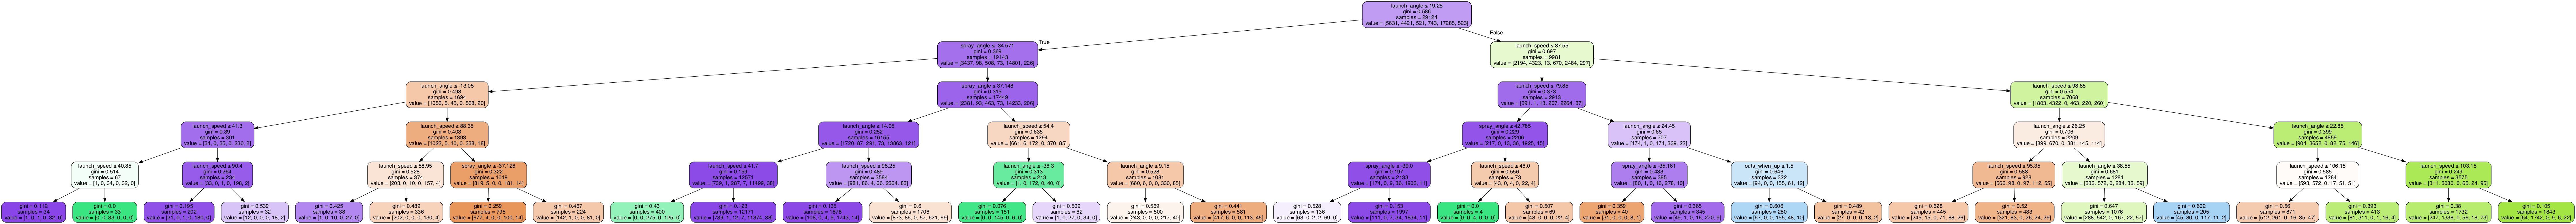

In [24]:
# Visualize the tree trained from complete dataset (optional)
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True,special_characters=True, feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## 2.2 Grid Search

In [25]:
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [1, 2, 5, 10],
    "min_samples_split": [2, 5, 10, 20]
}

In [26]:
clf=DecisionTreeClassifier()

dt_grid_search = GridSearchCV(clf, param_grid, cv=3, return_train_score=True)
dt_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 5, 10],
                        

In [27]:
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])
dt_gs_testing_score = dt_grid_search.score(X_train, y_train)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Testing Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")

Mean Training Score: 77.55%
Mean Testing Score: 87.39%
Best Parameter Combination Found During Grid Search:


In [28]:
dt_grid_search.best_params_

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 20}

## 2.3 Best Tree

In [29]:
clf=DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split = 20)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [30]:
acc = accuracy_score(y_test,y_pred) * 100
print("Accuracy is :{0}".format(acc))
# Check the AUC for predictions
# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

Accuracy is :83.34534967555875

Confusion Matrix
----------------
Predicted  double  home_run  sac_bunt  sac_fly  single  triple   All
True                                                                
double       1196       208         0       31     456      17  1908
home_run      139      1263         0       13       8       7  1430
sac_bunt        0         0       162        0      18       0   180
sac_fly        56        48         0      106      37       2   249
single        349        17        12        9    5364       7  5758
triple        101        40         0        2      40       1   184
All          1841      1576       174      161    5923      34  9709


## 2.4 Use SMOTE to Correct Imbalance

In [31]:
print(y_train.value_counts()) #Previous original class distribution
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_sample(X_train, y_train) 
print(pd.Series(y_train_smote).value_counts()) #Preview synthetic sample class distributi

single      17285
double       5631
home_run     4421
sac_fly       743
triple        523
sac_bunt      521
Name: events, dtype: int64
home_run    17285
single      17285
sac_bunt    17285
triple      17285
sac_fly     17285
double      17285
dtype: int64


In [32]:
clf=DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split = 20)
clf.fit(X_train_smote, y_train_smote)
y_pred = clf.predict(X_test)

In [33]:
acc = accuracy_score(y_test,y_pred) * 100
print("Accuracy is :{0}".format(acc))
# Check the AUC for predictions
# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

Accuracy is :77.20671541868369

Confusion Matrix
----------------
Predicted  double  home_run  sac_bunt  sac_fly  single  triple   All
True                                                                
double        917       159         0       91     382     359  1908
home_run       88      1095         0       61       2     184  1430
sac_bunt        0         0       173        0       7       0   180
sac_fly        18        11         0      179      16      25   249
single        379        22        20      118    5070     149  5758
triple         52        23         0       12      35      62   184
All          1454      1310       193      461    5512     779  9709


## 2.5 Use Scaler to Normalize Continuous Data

In [34]:
# Scale Training Data

scaler = StandardScaler()
scaled_data_train = scaler.fit_transform(X_train_smote)
scaled_data_test = scaler.transform(X_test)

In [35]:
scaled_data_train

array([[ 0.85183432,  1.35605436, -0.22078764, ..., -0.61457824,
         0.41221036, -0.41127397],
       [ 0.54374293, -0.83787422,  0.05319137, ..., -0.61457824,
         0.41221036, -0.41127397],
       [-1.55512964, -1.15733193, -0.07222156, ..., -0.61457824,
         0.41221036, -0.41127397],
       ...,
       [ 0.19582396,  1.85213351,  0.43907001, ..., -0.61457824,
         0.41221036, -0.41127397],
       [ 0.85189448, -0.34342326,  1.14240868, ..., -0.61457824,
         0.41221036, -0.41127397],
       [ 0.90308527, -0.48049855,  1.10263558, ..., -0.61457824,
         0.41221036, -0.41127397]])

In [36]:
clf=DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split = 20)
clf.fit(scaled_data_train, y_train_smote)
y_pred = clf.predict(scaled_data_test)

In [37]:
acc = accuracy_score(y_test,y_pred) * 100
print("Accuracy is :{0}".format(acc))
# Check the AUC for predictions
# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

Accuracy is :77.2273148624987

Confusion Matrix
----------------
Predicted  double  home_run  sac_bunt  sac_fly  single  triple   All
True                                                                
double        917       159         0       90     382     360  1908
home_run       87      1096         0       61       2     184  1430
sac_bunt        0         0       172        0       8       0   180
sac_fly        18        11         0      179      16      25   249
single        378        22        19      118    5072     149  5758
triple         52        23         0       12      35      62   184
All          1452      1311       191      460    5515     780  9709


In [38]:
scaler = MinMaxScaler()
scaled_data_train = scaler.fit_transform(X_train_smote)
scaled_data_test = scaler.transform(X_test)

In [39]:
scaled_data_train

array([[0.8161157 , 0.67303738, 0.78084543, ..., 0.        , 1.        ,
        0.        ],
       [0.78305785, 0.28017015, 0.79873689, ..., 0.        , 1.        ,
        0.        ],
       [0.55785124, 0.2229648 , 0.79054714, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.74572655, 0.76187037, 0.82393564, ..., 0.        , 1.        ,
        0.        ],
       [0.81612216, 0.36871159, 0.86986526, ..., 0.        , 1.        ,
        0.        ],
       [0.82161487, 0.34416549, 0.86726799, ..., 0.        , 1.        ,
        0.        ]])

In [40]:
clf=DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split = 20)
clf.fit(scaled_data_train, y_train_smote)
y_pred = clf.predict(scaled_data_test)
training_pred = clf.predict(scaled_data_train)

In [41]:
acc = accuracy_score(y_test,y_pred) * 100
acc2 = accuracy_score(y_train_smote, training_pred)*100
print("Testing Accuracy is :{0}".format(acc))
print("Training Accuracy is :{0}".format(acc2))
# Check the AUC for predictions
# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

Testing Accuracy is :77.26851375012875
Training Accuracy is :80.0

Confusion Matrix
----------------
Predicted  double  home_run  sac_bunt  sac_fly  single  triple   All
True                                                                
double        915       159         0       91     383     360  1908
home_run       87      1096         0       61       2     184  1430
sac_bunt        0         0       173        0       7       0   180
sac_fly        18        11         0      179      16      25   249
single        372        22        19      118    5077     150  5758
triple         52        23         0       12      35      62   184
All          1444      1311       192      461    5520     781  9709


## 2.6 Plot Feature Importance

range(0, 47)


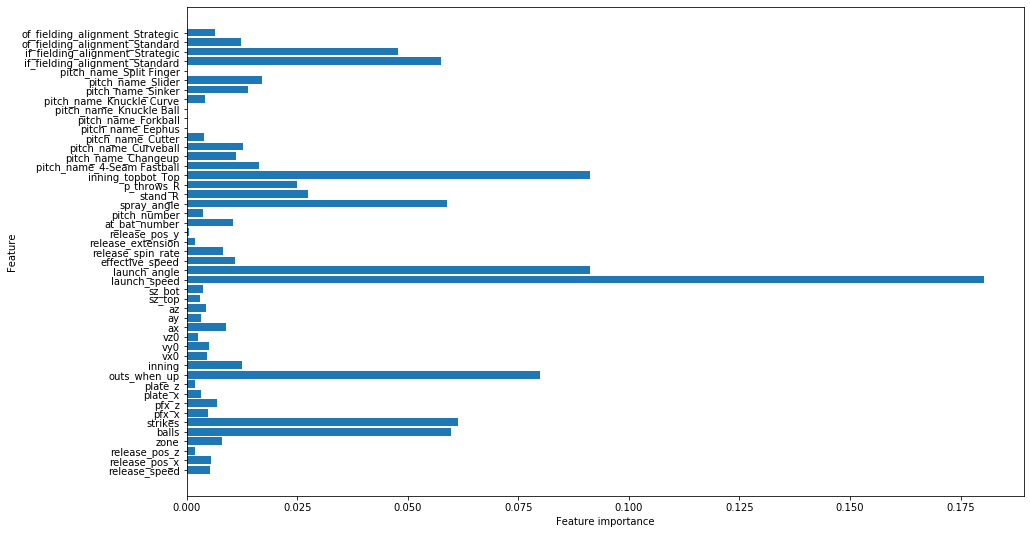

In [111]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(15,9))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    print(range(n_features))

plot_feature_importances(clf)

## 2.7 Small Tree for Visualization

In [43]:
clf=DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split = 20)
clf.fit(scaled_data_train, y_train_smote)
y_pred = clf.predict(scaled_data_test)

In [44]:
acc = accuracy_score(y_test,y_pred) * 100
print("Accuracy is :{0}".format(acc))
# Check the AUC for predictions
# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

Accuracy is :60.63446286950253

Confusion Matrix
----------------
Predicted  double  home_run  sac_bunt  sac_fly  single   All
True                                                        
double        858       234         0      367     449  1908
home_run       82      1178         0      169       1  1430
sac_bunt        0         0       178        0       2   180
sac_fly        28        29         0      191       1   249
single       1537        21        84      634    3482  5758
triple         69        39         0       48      28   184
All          2574      1501       262     1409    3963  9709


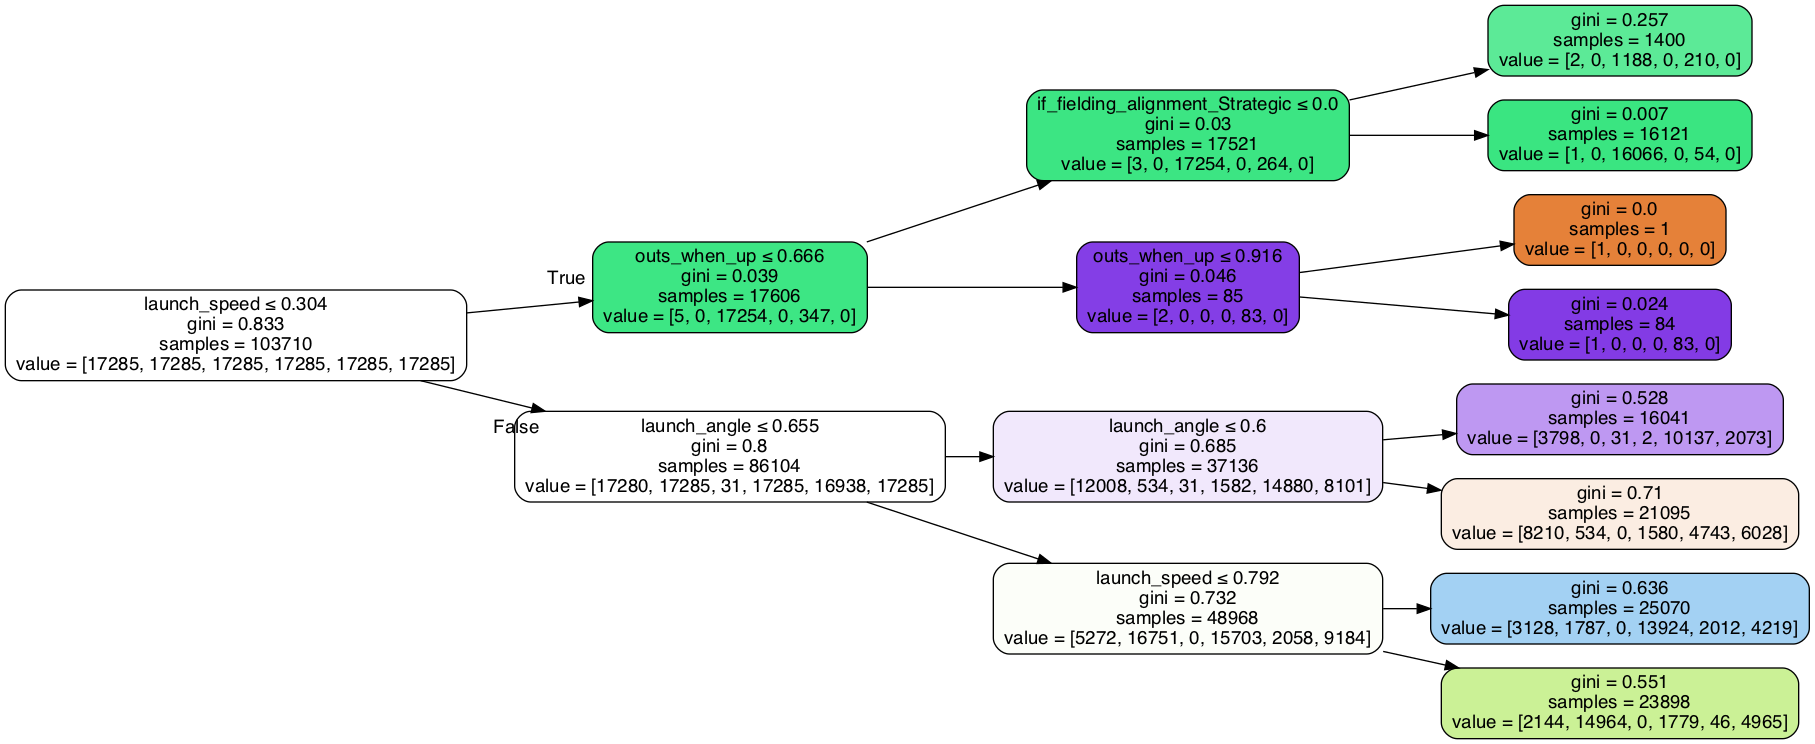

In [45]:
# Visualize the tree trained from complete dataset (optional)
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True,special_characters=True, feature_names=X_train.columns, rotate=True, )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

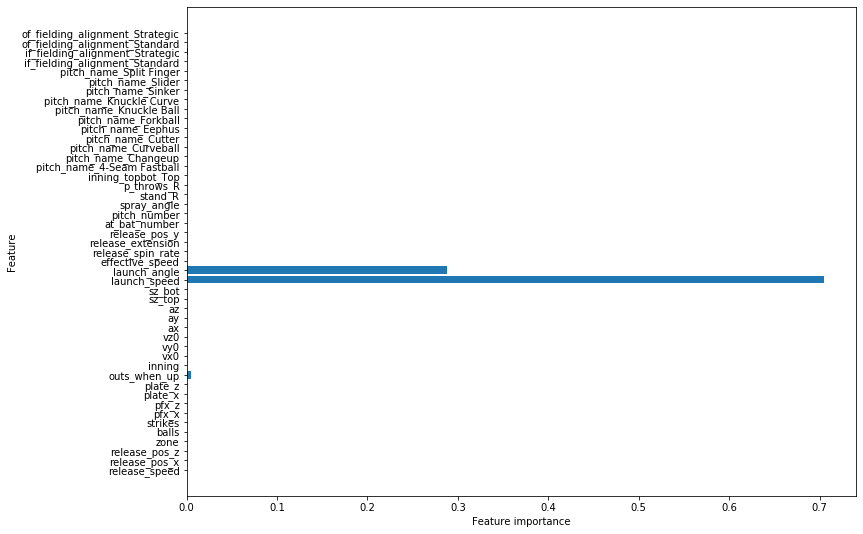

In [46]:
plot_feature_importances(clf)

# 3. Random Forest

In [47]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(scaled_data_train, y_train_smote)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [48]:
print(forest.score(scaled_data_train, y_train_smote))
print(forest.score(scaled_data_test, y_test))

0.7294282132870504
0.7267483777937995


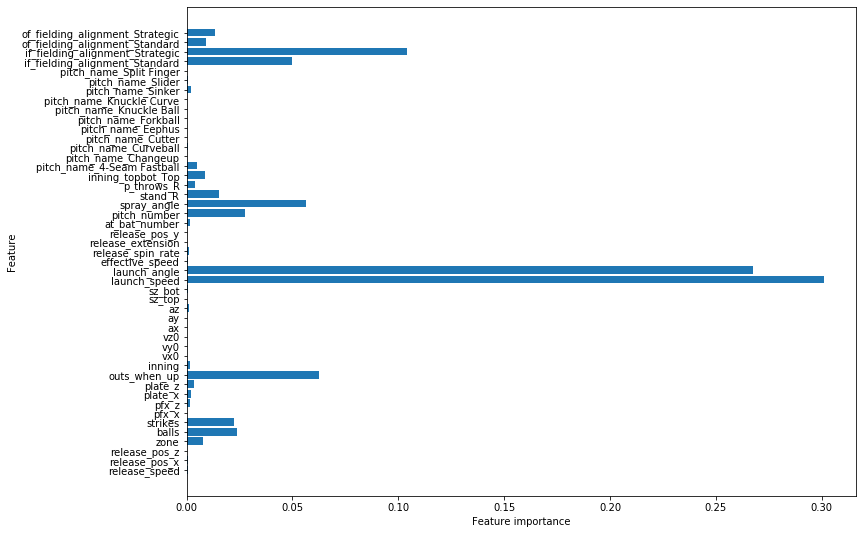

In [49]:
plot_feature_importances(forest)

In [50]:
print('\nConfusion Matrix')
print('----------------')
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True, normalize=True))


Confusion Matrix
----------------
Predicted    double  home_run  sac_bunt   sac_fly    single       All
True                                                                 
double     0.088372  0.024101  0.000000  0.037800  0.046246  0.196519
home_run   0.008446  0.121331  0.000000  0.017407  0.000103  0.147286
sac_bunt   0.000000  0.000000  0.018334  0.000000  0.000206  0.018539
sac_fly    0.002884  0.002987  0.000000  0.019672  0.000103  0.025646
single     0.158307  0.002163  0.008652  0.065300  0.358636  0.593058
triple     0.007107  0.004017  0.000000  0.004944  0.002884  0.018951
All        0.265115  0.154599  0.026985  0.145123  0.408178  1.000000


In [51]:
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [5, 10],
    "min_samples_split": [2, 5, 10]
}

In [52]:
forest=RandomForestClassifier()

rf_grid_search = GridSearchCV(forest, param_grid, cv=3, return_train_score=True)
rf_grid_search.fit(scaled_data_train, y_train_smote)

rf_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])
rf_gs_testing_score = dt_grid_search.score(scaled_data_train, y_train_smote)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Testing Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
rf_grid_search.best_params_

Mean Training Score: 77.55%
Mean Testing Score: 87.39%
Best Parameter Combination Found During Grid Search:


{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 5}

0.8499662520489828
0.7914306313729529


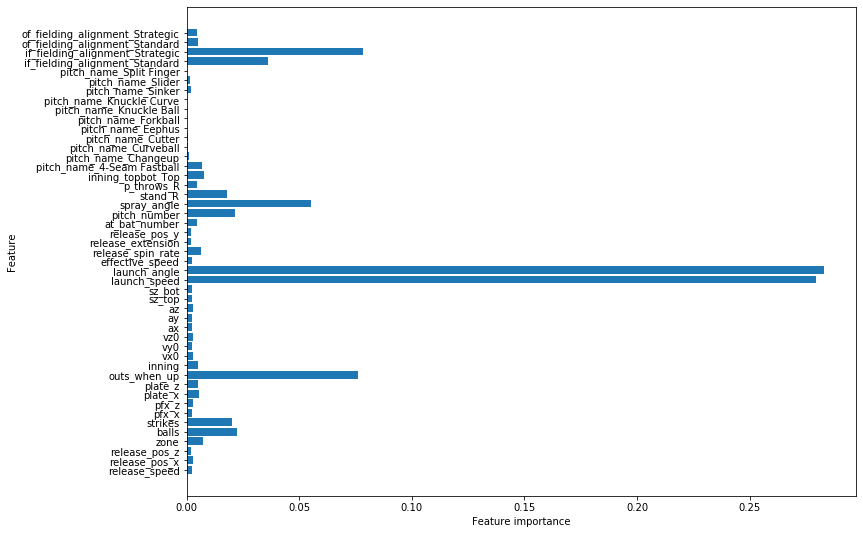

In [53]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 10, min_samples_split=5, criterion='entropy')
forest.fit(scaled_data_train, y_train_smote)
print(forest.score(scaled_data_train, y_train_smote))
print(forest.score(scaled_data_test, y_test))
plot_feature_importances(forest)

In [54]:
for name, importance in zip(X_train.columns, forest.feature_importances_):
    print(name, "=", importance)

release_speed = 0.002534834436974714
release_pos_x = 0.0027879657309019187
release_pos_z = 0.0020811370939800896
zone = 0.007215423398636657
balls = 0.02239868892458954
strikes = 0.020075164266960734
pfx_x = 0.002306715440290391
pfx_z = 0.0029364093281468804
plate_x = 0.005731177771978214
plate_z = 0.0051751430571741015
outs_when_up = 0.07616783310495885
inning = 0.004893950089481847
vx0 = 0.0029116189164202087
vy0 = 0.002374008324529547
vz0 = 0.0026396575485483085
ax = 0.0026179503854009364
ay = 0.0022472822509990967
az = 0.002954490288083653
sz_top = 0.0023774585729466305
sz_bot = 0.00261442136695019
launch_speed = 0.2794194652474446
launch_angle = 0.2831988834593365
effective_speed = 0.0024535235723913387
release_spin_rate = 0.006451060683565475
release_extension = 0.002137151248500522
release_pos_y = 0.001982468075012799
at_bat_number = 0.0047050878275678365
pitch_number = 0.021303140608524587
spray_angle = 0.055379086307194875
stand_R = 0.018100649737019452
p_throws_R = 0.00482876

# KNN

In [166]:
clf1 = KNeighborsClassifier(n_neighbors=1)
clf1.fit(scaled_data_train, y_train_smote)
test_preds = clf1.predict(scaled_data_test)
train_preds = clf1.predict(scaled_data_train)

In [167]:
def print_metrics(labels, preds):
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    
print_metrics(y_test, test_preds)
print_metrics(y_train_smote, train_preds)

Accuracy Score: 0.4756411576887424
Accuracy Score: 1.0


In [57]:
print('\nConfusion Matrix')
print('----------------')
print(pd.crosstab(y_test, test_preds, rownames=['True'], colnames=['Predicted'], margins=True))


Confusion Matrix
----------------
Predicted  double  home_run  sac_bunt  sac_fly  single  triple   All
True                                                                
double        573       484         2      122     622     105  1908
home_run      413       495         2      102     329      89  1430
sac_bunt        5         1       143        6      22       3   180
sac_fly        64        61         1       48      56      19   249
single       1446       942        59      405    2590     316  5758
triple         44        55         0       14      59      12   184
All          2545      2038       207      697    3678     544  9709


In [157]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=7):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        acc = accuracy_score(y_test, preds)
        if acc > best_score:
            best_k = k
            best_score = acc
    
    print("Best Value for k: {}".format(best_k))
    print("Accuracy Score: {}".format(best_score))

In [159]:
find_best_k(scaled_data_train, y_train_smote, scaled_data_test, y_test, min_k=1, max_k=9)

Best Value for k: 1
Accuracy Score: 0.4756411576887424


In [160]:
find_best_k(scaled_data_train, y_train_smote, scaled_data_test, y_test, min_k=11, max_k=35)

Best Value for k: 11
Accuracy Score: 0.3665671026882274


# Gradient Boost

In [60]:
gbt_clf = GradientBoostingClassifier()

In [162]:
gbt_clf.fit(scaled_data_train, y_train_smote)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [62]:
gbt_clf_scaled_train_preds = gbt_clf.predict(scaled_data_train)
gbt_clf_scaled_test_preds = gbt_clf.predict(scaled_data_test)

In [63]:
def display_acc(true, preds, model_name):
    acc = accuracy_score(true, preds)
#     f1 = f1_score(true, preds)
    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(acc))
#     print("F1-Score: {}".format(f1))
    
print("Training Metrics")
display_acc(y_train_smote, gbt_clf_scaled_train_preds, model_name='Gradient Boosted Trees')
print("")
print("Testing Metrics")
display_acc(y_test, gbt_clf_scaled_test_preds, model_name='Gradient Boosted Trees')

Training Metrics
Model: Gradient Boosted Trees
Accuracy: 0.8542474206923151

Testing Metrics
Model: Gradient Boosted Trees
Accuracy: 0.8379853743948913


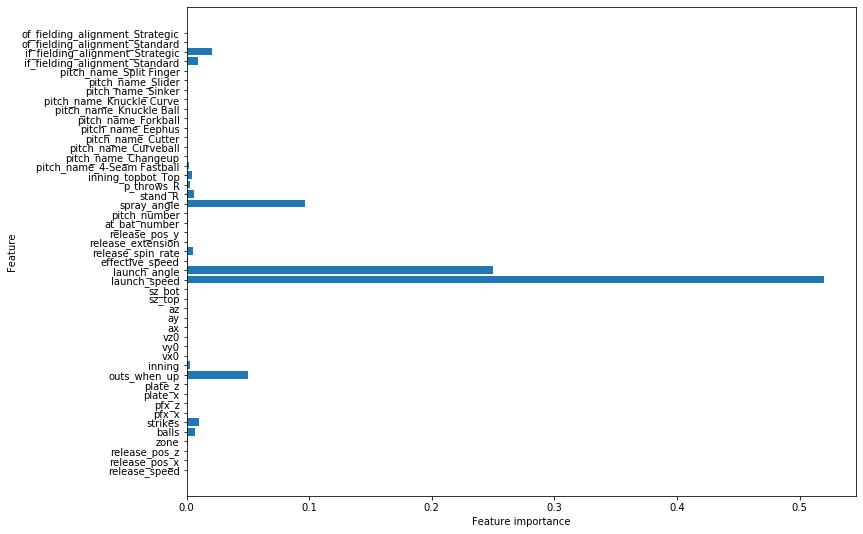

In [95]:
plot_feature_importances(gbt_clf)

# XG Boost

In [64]:
clf = xgb.XGBClassifier()
clf.fit(scaled_data_train, y_train_smote)
training_preds = clf.predict(scaled_data_train)
val_preds = clf.predict(scaled_data_test)
training_accuracy = accuracy_score(y_train_smote, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

Training Accuracy: 83.36%
Validation accuracy: 82.85%


In [65]:
param_grid = {
    "learning_rate": [0.1],
    'max_depth': [5, 10],
    'min_child_weight': [10],
    'subsample': [ 0.7],
    'n_estimators': [100],
}

In [66]:
# grid_clf = GridSearchCV(clf, param_grid, scoring='accuracy', cv=5, n_jobs=1)
# grid_clf.fit(scaled_data_train, y_train_smote)

# best_parameters = grid_clf.best_params_

# print("Grid Search found the following optimal parameters: ")
# for param_name in sorted(best_parameters.keys()):
#     print("%s: %r" % (param_name, best_parameters[param_name]))

# training_preds = grid_clf.predict(scaled_data_train)
# val_preds = grid_clf.predict(scaled_data_test)
# training_accuracy = accuracy_score(y_train_smote, training_preds)
# val_accuracy = accuracy_score(y_test, val_preds)

# print("")
# print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
# print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

In [67]:
print('\nConfusion Matrix')
print('----------------')
print(pd.crosstab(y_test, val_preds, rownames=['True'], colnames=['Predicted'], margins=True))


Confusion Matrix
----------------
Predicted  double  home_run  sac_bunt  sac_fly  single  triple   All
True                                                                
double       1045       214         0      122     427     100  1908
home_run       70      1265         0       65       1      29  1430
sac_bunt        0         0       176        0       4       0   180
sac_fly        14        15         0      191      20       9   249
single        276        23        27       60    5343      29  5758
triple         58        42         0       19      41      24   184
All          1463      1559       203      457    5836     191  9709


In [68]:
print('\nConfusion Matrix')
print('----------------')
print(pd.crosstab(y_test, val_preds, rownames=['True'], colnames=['Predicted'], margins=True, normalize=True))


Confusion Matrix
----------------
Predicted    double  home_run  sac_bunt   sac_fly    single    triple  \
True                                                                    
double     0.107632  0.022041  0.000000  0.012566  0.043980  0.010300   
home_run   0.007210  0.130291  0.000000  0.006695  0.000103  0.002987   
sac_bunt   0.000000  0.000000  0.018128  0.000000  0.000412  0.000000   
sac_fly    0.001442  0.001545  0.000000  0.019672  0.002060  0.000927   
single     0.028427  0.002369  0.002781  0.006180  0.550314  0.002987   
triple     0.005974  0.004326  0.000000  0.001957  0.004223  0.002472   
All        0.150685  0.160573  0.020908  0.047070  0.601092  0.019672   

Predicted       All  
True                 
double     0.196519  
home_run   0.147286  
sac_bunt   0.018539  
sac_fly    0.025646  
single     0.593058  
triple     0.018951  
All        1.000000  


# Accuracy Visualization

In [69]:
X_test['y_pred'] = val_preds

In [70]:
X_test['y_test'] = y_test

In [71]:
X_test_viz_df = X_test[['y_pred', 'y_test', 'launch_angle', 'launch_speed']]

In [72]:
X_test_viz_df.head()

y_pred  y_test  launch_angle  launch_speed
12393    single  single           6.5          90.7
2535   home_run  single          20.8         104.9
36581    single  single           4.0         100.7
28306    single  single         -49.7          63.8
33718    single  single          13.7          94.9

In [73]:
X_test_viz_df["correct"] = np.where(X_test_viz_df.y_pred == X_test_viz_df.y_test, 'True', 'False')

In [74]:
import os

if not os.path.exists("images"):
    os.mkdir("images")

In [75]:
fig = px.scatter(X_test_viz_df[:], x="launch_speed", y="launch_angle", log_x=False, log_y = False, hover_name="y_test",
                hover_data = ['y_pred'], color="correct", title="Test Errors", color_discrete_map={"True": "#009F0D", "False":"#FFC93F"})
fig.update_xaxes(title_text='Launch Speed')
fig.update_yaxes(title_text='Launch Angle')
fig.show()

In [94]:
fig = px.scatter(X_test_viz_df.loc[X_test_viz_df['y_test'] == 'triple'], x="launch_speed", y="launch_angle", log_x=False, log_y = False, hover_name="y_test",
                hover_data = ['y_pred'], color="correct", title="True Triples", color_discrete_map={"True": "#009F0D", "False":"#FFC93F"})
fig.update_xaxes(title_text='Launch Speed')
fig.update_yaxes(title_text='Launch Angle')
fig.show()

In [76]:
events = ['single',  'double',  'triple',  'home_run',  'sac_bunt',  'sac_fly']

Confusion matrix, without normalization
[[5343  276   29   23   27   60]
 [ 427 1045  100  214    0  122]
 [  41   58   24   42    0   19]
 [   1   70   29 1265    0   65]
 [   4    0    0    0  176    0]
 [  20   14    9   15    0  191]]
Normalized confusion matrix
[[9.28e-01 4.79e-02 5.04e-03 3.99e-03 4.69e-03 1.04e-02]
 [2.24e-01 5.48e-01 5.24e-02 1.12e-01 0.00e+00 6.39e-02]
 [2.23e-01 3.15e-01 1.30e-01 2.28e-01 0.00e+00 1.03e-01]
 [6.99e-04 4.90e-02 2.03e-02 8.85e-01 0.00e+00 4.55e-02]
 [2.22e-02 0.00e+00 0.00e+00 0.00e+00 9.78e-01 0.00e+00]
 [8.03e-02 5.62e-02 3.61e-02 6.02e-02 0.00e+00 7.67e-01]]


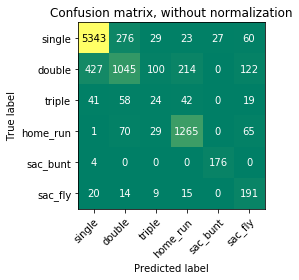

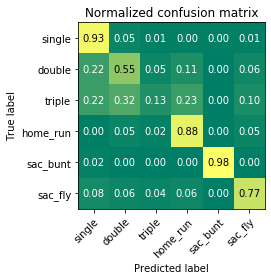

In [77]:
def plot_confusion_matrix(y_true, y_pred, classes,
                         normalize=False,
                         title=None,
                         cmap=plt.cm.summer):
   """
   This function prints and plots the confusion matrix.
   Normalization can be applied by setting normalize=True.
   """
   if not title:
       if normalize:
           title = 'Normalized confusion matrix'
       else:
           title = 'Confusion matrix, without normalization'
   # Compute confusion matrix
   cm = confusion_matrix(y_true, y_pred, labels=events)
   # Only use the labels that appear in the data
   if normalize:
       cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
       print("Normalized confusion matrix")
   else:
       print('Confusion matrix, without normalization')
   print(cm)
   fig, ax = plt.subplots()
   im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
   # We want to show all ticks...
   ax.set(xticks=np.arange(cm.shape[1]),
          yticks=np.arange(cm.shape[0]),
          # ... and label them with the respective list entries
          xticklabels=classes, yticklabels=classes,
          title=title,
          ylabel='True label',
          xlabel='Predicted label')
   # Rotate the tick labels and set their alignment.
   plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")
   # Loop over data dimensions and create text annotations.
   fmt = '.2f' if normalize else 'd'
   thresh = cm.max() / 2.
   for i in range(cm.shape[0]):
       for j in range(cm.shape[1]):
           ax.text(j, i, format(cm[i, j], fmt),
                   ha="center", va="center",
                   color="black" if cm[i, j] > thresh else "white")
   fig.tight_layout()
   return ax
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, val_preds, classes=events,
                     title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plot_confusion_matrix(y_test, val_preds, classes=events, normalize=True,
                     title='Normalized confusion matrix')